## Abundances driven by Boolean network states

2024-2025

Alan M H Beem

##### This file demonstrates functionality of AbundantBooleanNetwork class

#### Abundances model:
int(bool) -> {0, 1}

Abundant node update: abundance(t + 1) = abundance(t) * degradation_rate + transcription_rate * int(state)

Nested abundant node update: Given a current state, choose a matching entry in output column, take the states of the corresponding input row to be the current states of the nested nodes Abundant nodes, compute abundances for each (I'm not sure what these would represent, but I wanted to see what it looked like)

In [1]:
# setup
from package.abn_mir_plotting_functions import *
from package.abn_mir_helper_functions import *


net_selection = select_network(20, 12, 25, 20, 35, 2000)  # -> [BooleanNetwork, list[BooleanNetwork], a_bn_index_of_maximum_length_cycle: int]  # maximum longest cycle length 45 can make for longer runtimes re perturbation transition matrix
for more_cycles in range(1000):
    net_selection[0].add_cycle_without_resample()
abun_bn_app_2 = AbundantBooleanNetwork(1, [1], 2, 400, 0)  # these values are replaced
abun_bn_app_2.from_boolean_network(net_selection[0])  # with construction from net_selection
abun_bn_app_2.add_abundant_nodes(15)
abun_bn_app_2.add_nested_nodes(5, 4, False, 64)
abun_bn_cycle_lengths = abun_bn_app_2.get_avg_cycle_length()
for each_node in abun_bn_app_2.get_all_abundant_nodes():
    each_node.random_setup(int(np.average(abun_bn_cycle_lengths)))
abundance_colors = get_colors(len(net_selection[0]), False)
bv_colors = get_colors(len(net_selection[0].bn_collapsed_cycles) + 10, True)
align_cycle_states_lists_of_cc_to_cons_seq(net_selection[0].bn_collapsed_cycles)
print(f"Calculated {len(net_selection[1])} networks.\nSelected network:\n{net_selection[0]}")
print('computing unit perturbations to cycle states')
abun_bn_app_2.compute_unit_perturbations_matrix(0, False)
print('done')
# TODO apply UMAP or similar to projection of cycles' abundances onto 2D

Calculated 250 networks.
Selected network:
BooleanNetwork: N=20. avg_k= 1.6. Run-ins: 1202. Observed cycles: 31. t_records: 1202. u_records: 0
Cycle lengths: [24, 24, 24, 12, 12, 8, 8, 6, 6, 6, 6, 6, 6, 4, 4, 4, 3, 3, 2, 2, 1, 1, 4, 1, 3, 2, 3, 1, 8, 2, 2]
computing unit perturbations to cycle states
done


#### Abundances over a transition from perturbation records

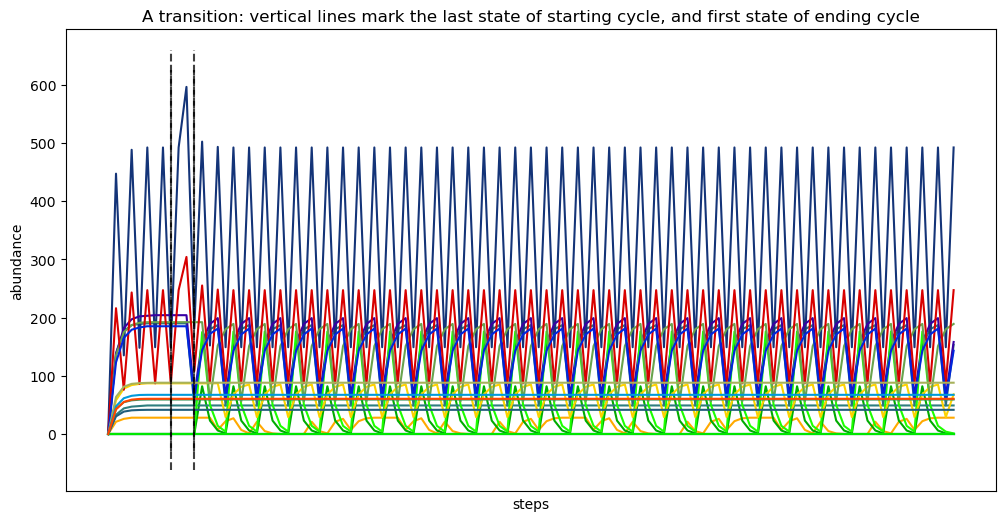

In [2]:
#### Abundances over a transition from perturbation records
shuffled_index_list = list(range(len(abun_bn_app_2.cycles_unit_perturbations_records)))
shuffle(shuffled_index_list)
for i in shuffled_index_list:
    record = abun_bn_app_2.cycles_unit_perturbations_records[i]
    if record.start_index is not None and record.end_index is not None:
        if record.start_index != record.end_index and len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.start_index]) != len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.end_index]):
            to_show = (start_cycle:=abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.start_index].cycle_states_list)  # then through index of ref state - 1
            while len(to_show) < 8:
                to_show.extend(start_cycle[1:])
            to_show.extend(start_cycle[1:start_cycle.index(record.reference_state)])
            v1 = len(to_show) - 1  # last index of starting cycle
            to_show.extend(record.run_in)
            v2 = len(to_show) - 1  # first index of ending cycle
            end_cycle = abun_bn_app_2.bn_collapsed_cycles.cycle_records[record.end_index].cycle_states_list
            to_show.extend(end_cycle[end_cycle.index(record.run_in[-1]) + 1:])
            to_show.extend(end_cycle[1:])
            to_show.extend(end_cycle[1:])
            to_show.extend(end_cycle[1:])
            abun_bn_app_2.animate_boolean_states_list(to_show, 1, True)
            break
plot_abundances(abun_bn_app_2.current_abundances_list, "A transition: vertical lines mark the last state of starting cycle, and first state of ending cycle", bv_colors, True, [v1, v2], None, None, [12, 6], [])

#### Additional outputs of abundances as a function of Boolean states (refers to same network as transition shown above)

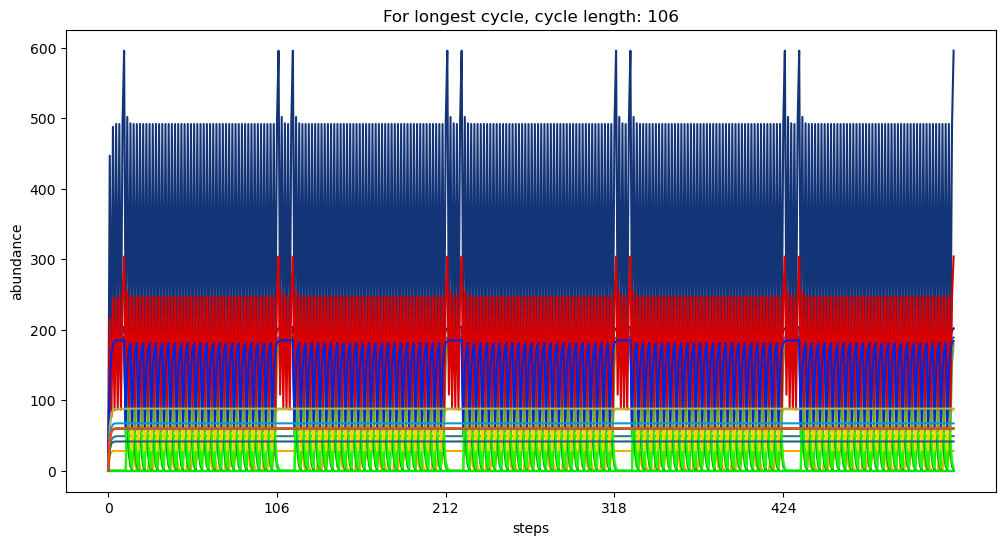

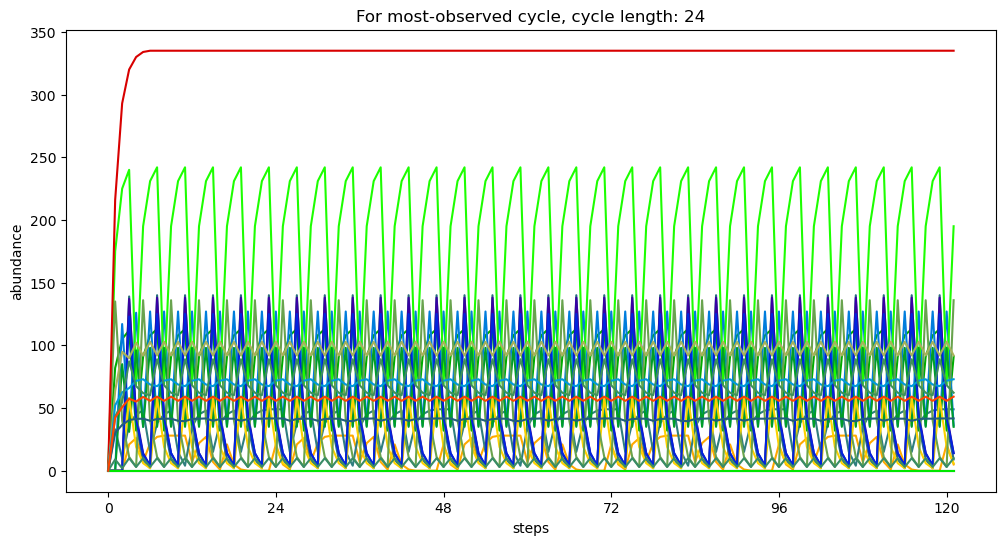

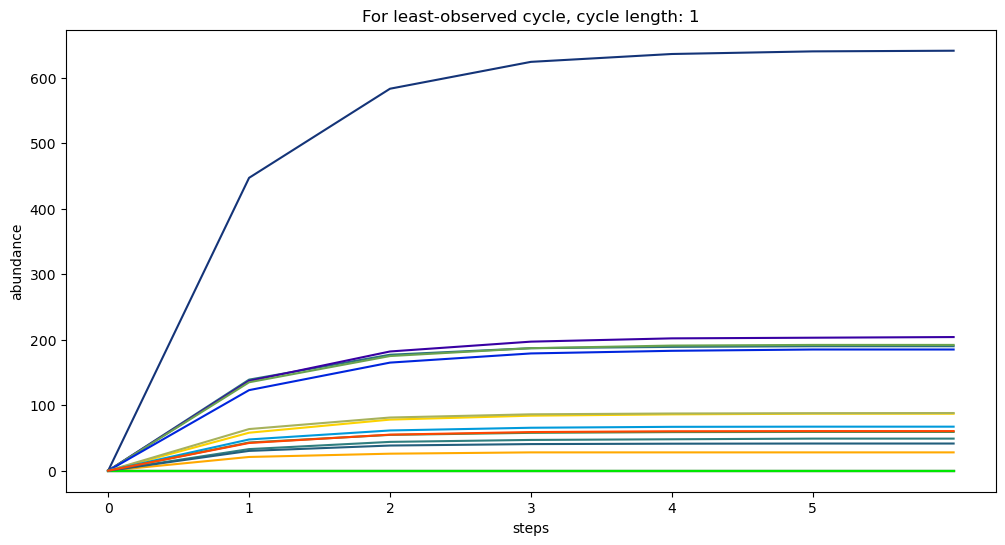

In [3]:
# TODO use heaps wrt each sortable dimension ? eliminate .notify using a reference to a property?
abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_cycle_length()
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = abun_bn_app_2.longest_cycle_length()
plot_abundances(abun_bn_app_2.current_abundances_list, "For longest cycle, cycle length: " + str(cycle_length), bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])

abun_bn_app_2.bn_collapsed_cycles.sort_cycle_records_by_num_observations()
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0])
plot_abundances(abun_bn_app_2.current_abundances_list, f"For most-observed cycle, cycle length: {len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[0])}", bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length) + 1)])

cycle_length = len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[-1])
abun_bn_app_2.animate_boolean_states_list(abun_bn_app_2.bn_collapsed_cycles.cycle_records[-1], 5, True)
plot_abundances(abun_bn_app_2.current_abundances_list, f"For least-observed cycle, cycle length: {len(abun_bn_app_2.bn_collapsed_cycles.cycle_records[-1])}", bv_colors, True, [], None, None, [12, 6], [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])

#### Nested node behavior, deterministic

In [4]:
abun_bn_app_3 = AbundantBooleanNetwork(1, [1], 2, 400, 0)  # these values are replaced
abun_bn_app_3.from_boolean_network(net_selection[0])  # with copy from net_selection
# abun_bn_app_2.add_abundant_nodes(15)
for i in range(2, 17):
    abun_bn_app_3.add_nested_nodes(1, 8, False, i)
abun_bn_app_3.bn_collapsed_cycles.sort_cycle_records_by_cycle_length()
for each_node in abun_bn_app_3.get_all_abundant_nodes():
    each_node.random_setup(abun_bn_app_3.longest_cycle_length())

A nested node:

In [5]:
SystemRandom().choice(abun_bn_app_3.get_plottable_nodes()).display()

inputs  	outputs

00000000	False
00000001	False
00000010	False
00000011	False
00000100	True
00000101	True
00000110	False
00000111	False
00001000	True
00001001	False
00001010	True
00001011	False
00001100	True
00001101	True
00001110	True
00001111	False
00010000	False
00010001	True
00010010	False
00010011	False
00010100	True
00010101	False
00010110	False
00010111	False
00011000	True
00011001	False
00011010	True
00011011	False
00011100	True
00011101	False
00011110	True
00011111	False
00100000	False
00100001	False
00100010	False
00100011	False
00100100	True
00100101	False
00100110	True
00100111	True
00101000	False
00101001	False
00101010	True
00101011	False
00101100	False
00101101	True
00101110	True
00101111	True
00110000	False
00110001	True
00110010	True
00110011	True
00110100	False
00110101	True
00110110	True
00110111	True
00111000	True
00111001	False
00111010	True
00111011	True
00111100	False
00111101	True
00111110	True
00111111	False
01000000	False
01000001	True
01000010	False
01000011	

AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 5 cycles


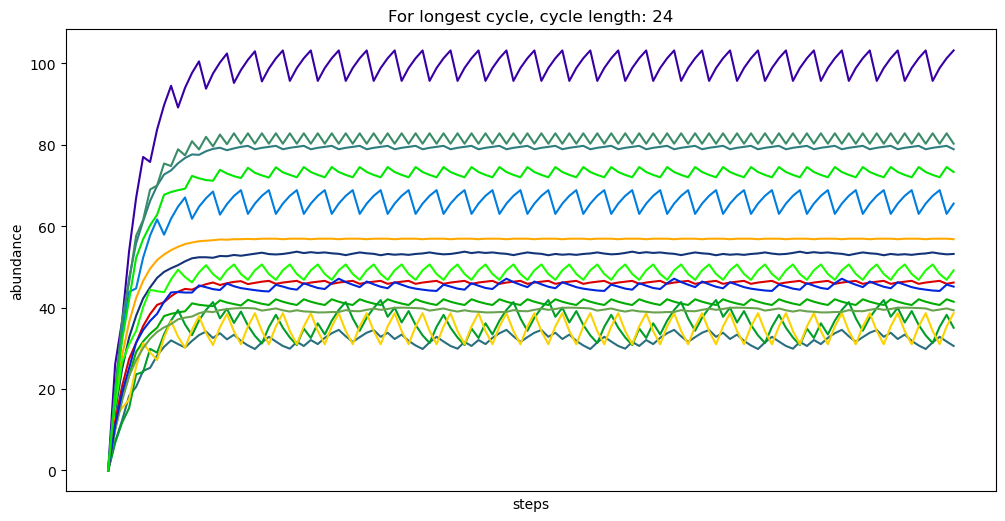

In [6]:
print("AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 5 cycles")
abun_bn_app_3.animate_boolean_states_list(abun_bn_app_3.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = abun_bn_app_3.longest_cycle_length()
plot_abundances(abun_bn_app_3.current_abundances_list, "For longest cycle, cycle length: " + str(cycle_length),
                bv_colors, True, [], None, None, [12, 6],
                [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])

#### Nested node behavior, pseudorandom

AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 3 cycles


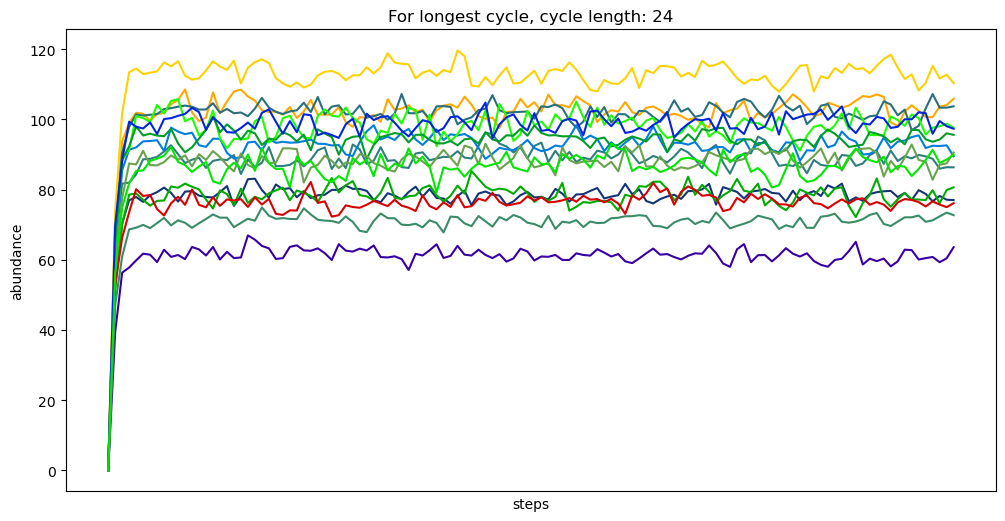

In [7]:
abun_bn_app_4 = AbundantBooleanNetwork(1, [1], 2, 400, 0)  # these values are replaced
abun_bn_app_4.from_boolean_network(net_selection[0])  # with construction from net_selection
# abun_bn_app_2.add_abundant_nodes(15)  # abun_bn_app_2.add_nested_nodes(5, 4, True, SystemRandom().randint(3,11))
for _ in range(15):
    abun_bn_app_4.add_nested_nodes(1, 16, True, SystemRandom().randint(1,128))
for each_node in abun_bn_app_4.get_all_abundant_nodes():
    each_node.random_setup(abun_bn_app_4.get_avg_cycle_length())
print("AbundantNodes with pseudorandom rates, assigned pseudorandomly to Boolean function nodes, for 3 cycles")
abun_bn_app_4.bn_collapsed_cycles.sort_cycle_records_by_cycle_length()
abun_bn_app_4.animate_boolean_states_list(abun_bn_app_4.bn_collapsed_cycles.cycle_records[0], 5, True)
cycle_length = abun_bn_app_4.longest_cycle_length()
plot_abundances(abun_bn_app_4.current_abundances_list, "For longest cycle, cycle length: " + str(cycle_length),
                bv_colors, True, [], None, None, [12, 6],
                [cycle_length * c_i for c_i in range(int(len(abun_bn_app_2.current_abundances_list) / cycle_length))])